In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import os
import sys
from scipy.stats import norm
from sklearn import preprocessing

debug = False

In [2]:
def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    
    X = x-mean
    X=X/std
    
    return X

In [3]:
def find_hypothesis(X,theta):
    return np.dot(X,theta)

def find_J_theta(X,Y,theta):
    hypothesis = find_hypothesis(X,theta)
    difference =  Y - hypothesis
    sum_sq = np.dot(difference.transpose(),difference)
    return sum_sq[0,0]/(2*X.shape[0])

def gradient(X,Y,theta):
    term1 = np.dot(X.transpose(),X)
    term2 = np.dot(term1,theta)
    term3 = np.dot(X.transpose(),Y)
    return(term2-term3)

def SGD(X,Y, learning_rate=0.001, error_threshold = 0.0000001):
    
    # theta shape is number of unknown parameters * 1 (2*1)
    theta = np.zeros((X.shape[1],1)) 
    
    list_error = []
    list_theta = []
    
    list_theta.append(theta)
    
    # Finding the error
    J_theta = find_J_theta(X,Y,theta)
    list_error.append(J_theta)
    
    epoch = 0
    while(True):
        epoch+=1
        theta = theta - learning_rate * gradient(X, Y, theta)
        J_theta_new = find_J_theta(X,Y,theta)
            
        list_error.append(J_theta_new)
        list_theta.append(theta)
        
        if(abs(J_theta_new-J_theta)<error_threshold or epoch>10000):
            return theta,list_error, list_theta,epoch
        J_theta = J_theta_new.copy()



In [4]:
X = genfromtxt('data/q1/linearX.csv', delimiter=',')
Y = genfromtxt('data/q1/linearY.csv',delimiter=',')

X_normal = normalize(X)
Y_normal = Y.copy()

if(debug):
    print(X)
    print(X_normal)
    
    print(Y)
    print(Y_normal)

X_normal=X_normal.reshape(-1,1)
Y_normal=Y_normal.reshape(-1,1)


# Adding the intercept
X_normal=np.hstack((X_normal,np.ones((X_normal.shape[0],1))))

Stoping criteria : abs cost difference < 0.0000001 or epoch>10000
Learning rate : 0.001
Number of epochs : 67
Final Theta :
 [[0.00133904]
 [0.9957635 ]]


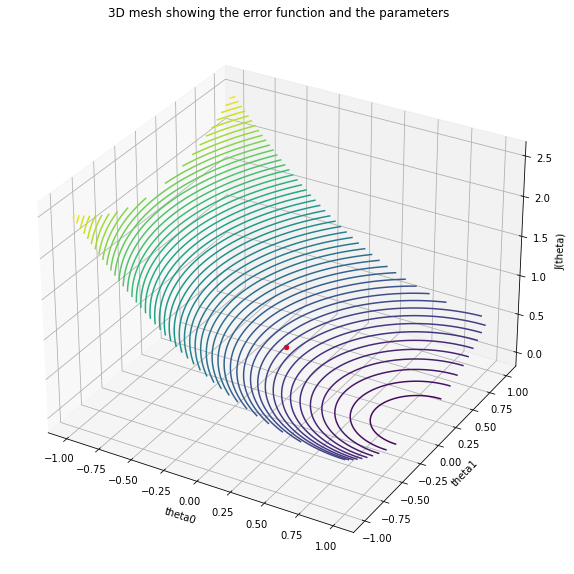

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
learning_rates = [0.001]

print("Stoping criteria : abs cost difference < 0.0000001 or epoch>10000")

for learning_rate in learning_rates:
    theta, lst_error,lst_theta,epoch = SGD(X_normal, Y_normal,learning_rate = learning_rate )
    print("Learning rate :",learning_rate)
    print("Number of epochs :",epoch)
    print("Final Theta :\n",theta)
    
    
    # evenly spaced sequence in a specified interval
    X_axis = np.linspace(-1,1,100)
    Y_axis = np.linspace(-1,1,100)

    X1, Y1 = np.meshgrid(X_axis, Y_axis)

    Z1 = np.asmatrix(np.zeros((100,100),dtype=float))

    for i in range(100):
        for j in range(100):
            Z1[i,j]=find_J_theta(X_normal, Y_normal,[[X1[i][j]],[Y1[i][j]]])

    Z1 = np.array(Z1)

    th0 = np.zeros((len(lst_theta),1),dtype=float)

    for i in range(len(lst_theta)):
        th0[i,0]=lst_theta[i][0]


    th1 = np.zeros((len(lst_theta),1),dtype=float)
    for i in range(len(lst_theta)):
        th1[i,0]=lst_theta[i][1]


    plt.figure(figsize=(10,10))

    plot3d = plt.axes(projection='3d')
    plot3d.contour3D(Y1, X1, Z1,50)

    plot3d.set_xlabel('theta0')
    plot3d.set_ylabel('theta1')
    plot3d.set_zlabel('J(theta)')

    plot3d.set_title("3D mesh showing the error function and the parameters")


    plt.ion()  
    for i in range(th0.shape[0]):
        plot3d.scatter(th1[i], th0[i], np.array(lst_error).reshape((-1,1))[i], color="r")
        plt.draw()
        plt.show()
        plt.pause(0.2)
    plt.ioff()

    plt.savefig('output/Ques1(c).png')